In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing 
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.cluster import KMeans

import plotly as py
import plotly.graph_objs as go
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score, calinski_harabasz_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
#load data
df = pd.read_csv('segmented_customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,1,19,15,39,3
1,2,1,21,15,81,4
2,3,0,20,16,6,3
3,4,0,23,16,77,4
4,5,0,31,17,40,3


In [4]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
cluster                   0
dtype: int64

In [5]:
#drop customerID column
df.drop("CustomerID", axis=1, inplace=True)

In [6]:
#standardize data
data = df.values
data = (data - np.mean(data, axis = 0)) / np.std(data, axis=0)

In [8]:
Z = linkage(data, method='ward')


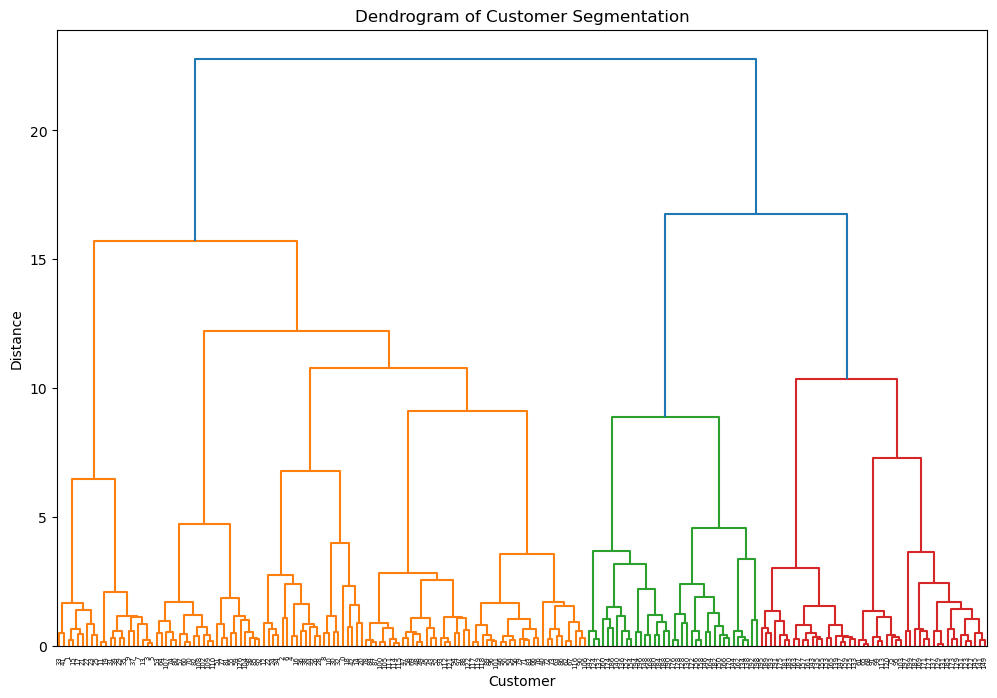

In [9]:
#plot dendrogram
plt.figure(figsize=(12,8))
dendrogram(Z)
plt.xlabel("Customer")
plt.ylabel("Distance")
plt.title("Dendrogram of Customer Segmentation")
plt.show()

In [12]:
# hierarchical clustering
Z = linkage(data, method='ward')
k = 5
clusters = fcluster(Z, k, criterion='maxclust')

# add cluster labels to dataframe
df['Cluster'] = clusters

In [13]:
summary_stats = df.groupby('Cluster').agg(['mean', 'median', 'std'])
print(summary_stats)

           Gender                         Age                    \
             mean median       std       mean median        std   
Cluster                                                           
1        0.428571    0.0  0.507093  25.333333   23.0   5.378971   
2        1.000000    1.0  0.000000  55.695652   57.0  11.295352   
3        0.128571    0.0  0.337142  42.485714   45.0  14.340318   
4        0.513514    1.0  0.506712  40.324324   41.0  11.525465   
5        0.571429    1.0  0.500000  30.428571   31.0   5.827378   

        Annual Income (k$)                   Spending Score (1-100)         \
                      mean median        std                   mean median   
Cluster                                                                      
1                25.095238   24.0   7.133756              80.047619   77.0   
2                54.478261   54.0   8.245492              49.260870   48.0   
3                45.042857   47.0  15.849323              40.342857   43.

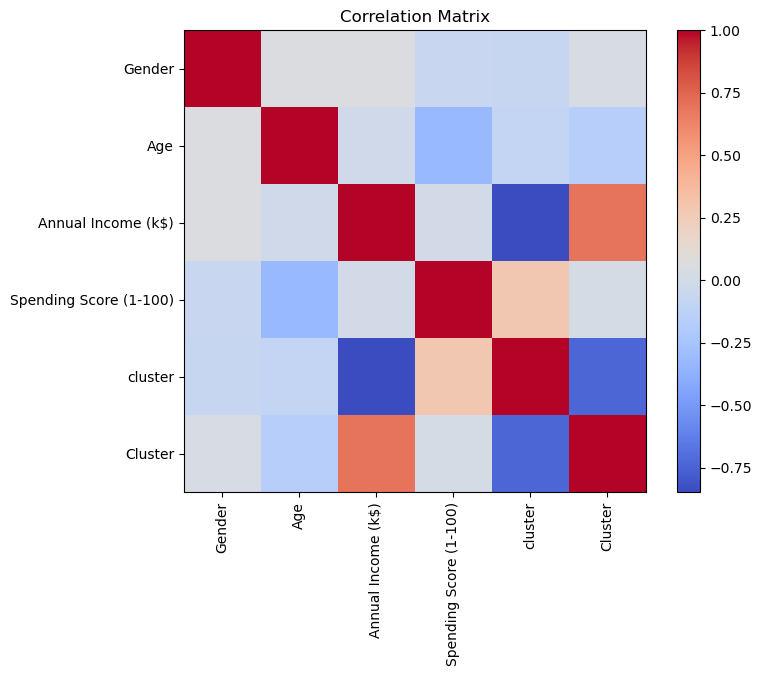

In [14]:
corr_matrix = df.corr()
plt.figure(figsize=(8,6))
plt.imshow(corr_matrix, cmap='coolwarm', interpolation='none')
plt.colorbar()
plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns, rotation = 90)
plt.yticks(range(len(corr_matrix.columns)), corr_matrix.columns)
plt.title('Correlation Matrix')
plt.show()

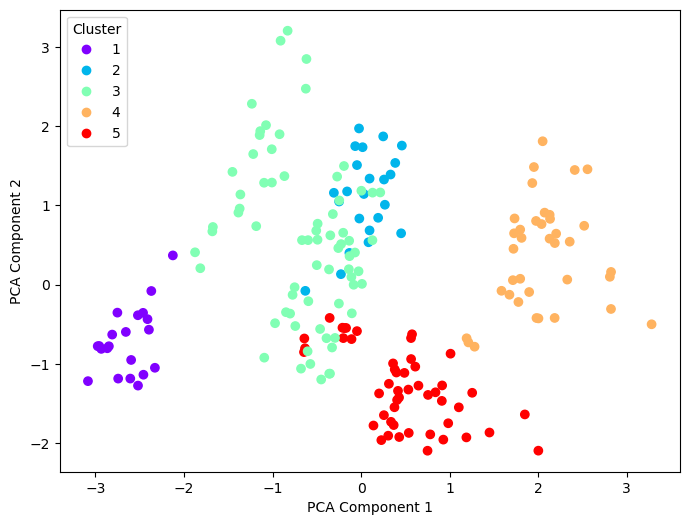

In [18]:
#dimensionality reduction with PCA
pca = PCA()
pca_data = pca.fit_transform(data)
plt.figure(figsize=(8,6))
scatter = plt.scatter(pca_data[:,0], pca_data[:,1], c=clusters, cmap = 'rainbow')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
legend = plt.legend(*scatter.legend_elements(), loc="upper left", title="Cluster")
plt.show()


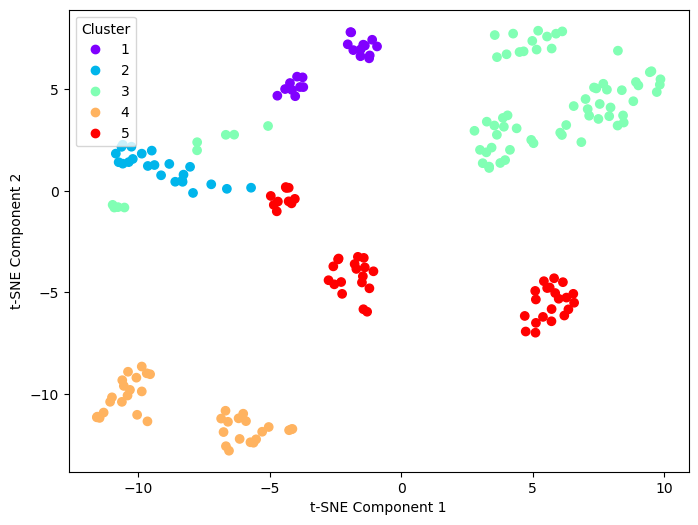

In [19]:
# dimensionality reduction with t-SNE
tsne = TSNE(n_components=2)
tsne_data = tsne.fit_transform(data)
plt.figure(figsize=(8, 6))
scatter = plt.scatter(tsne_data[:, 0], tsne_data[:, 1], c=clusters, cmap='rainbow')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
legend = plt.legend(*scatter.legend_elements(), loc="upper left", title="Cluster")
plt.show()

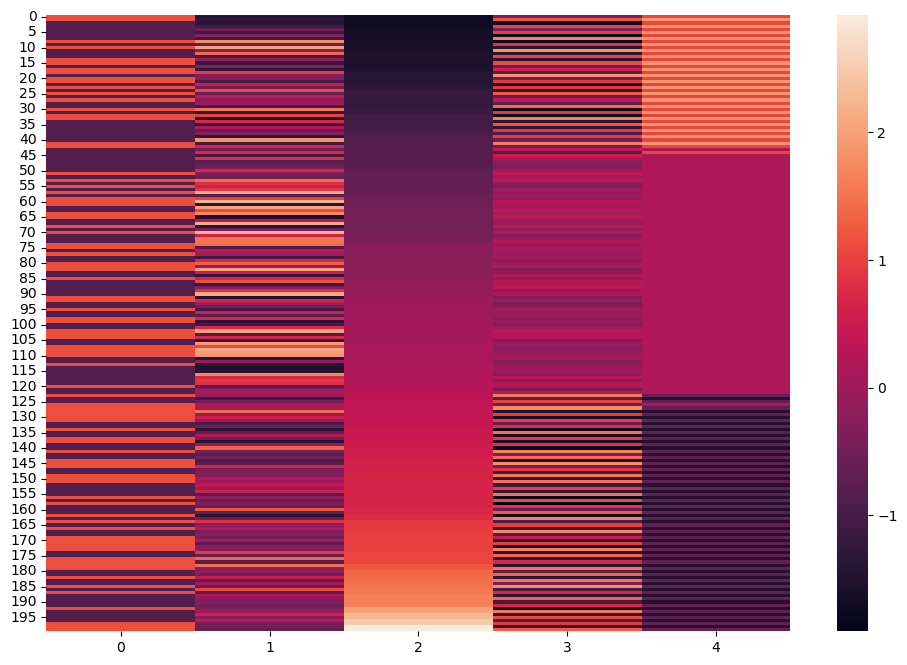

In [21]:
plt.figure(1, figsize= (12,8))
sns.heatmap(data)
plt.show()

In [22]:
# cluster validation
silhouette = silhouette_score(data, clusters)
calinski = calinski_harabasz_score(data, clusters)
print(f"Silhouette score: {silhouette:.3f}")
print(f"Calinski-Harabasz score: {calinski:.3f}")

Silhouette score: 0.315
Calinski-Harabasz score: 72.426


In [23]:
# customer profiling
profiles = df.groupby('Cluster').mean()
print(profiles)

           Gender        Age  Annual Income (k$)  Spending Score (1-100)  \
Cluster                                                                    
1        0.428571  25.333333           25.095238               80.047619   
2        1.000000  55.695652           54.478261               49.260870   
3        0.128571  42.485714           45.042857               40.342857   
4        0.513514  40.324324           87.432432               18.189189   
5        0.571429  30.428571           80.489796               76.102041   

          cluster  
Cluster            
1        4.000000  
2        2.000000  
3        2.328571  
4        0.000000  
5        1.204082  


In [26]:
# Perform K-Means clustering
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans.fit(df.iloc[:, 2:])

KMeans(n_clusters=5, n_init=10, random_state=0)

In [28]:
# Add cluster labels to dataframe
df['Cluster'] = kmeans.labels_


In [29]:
# Compute mean values of each feature for each cluster
cluster_means = df.groupby('Cluster').mean()

# Print the cluster means
print(cluster_means)

           Gender        Age  Annual Income (k$)  Spending Score (1-100)  \
Cluster                                                                    
0        0.542857  41.114286           88.200000               17.114286   
1        0.407407  42.716049           55.296296               49.518519   
2        0.461538  32.692308           86.538462               82.128205   
3        0.409091  25.272727           25.727273               79.363636   
4        0.391304  45.217391           26.304348               20.913043   

          cluster  
Cluster            
0        0.000000  
1        1.950617  
2        1.000000  
3        3.909091  
4        3.000000  


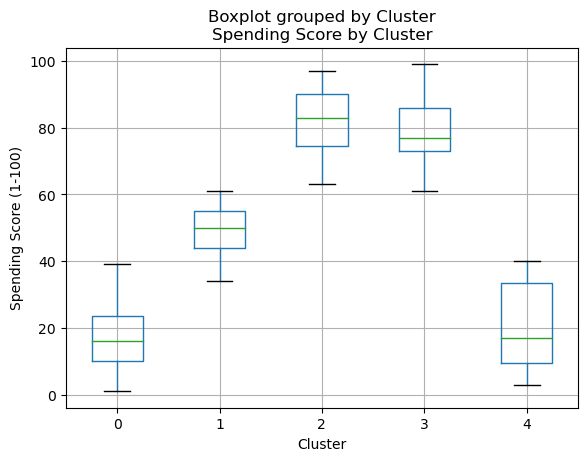

In [30]:
# Create box plots of spending score for each cluster
df.boxplot(column=['Spending Score (1-100)'], by='Cluster')
plt.title('Spending Score by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Spending Score (1-100)')
plt.show()

In [32]:
# Create customer personas
personas = {}

# Affluent Shoppers
affluent = df[df['Cluster']==4]
affluent_percent = len(affluent) / len(df) * 100
affluent_income = affluent['Annual Income (k$)'].mean()
affluent_spending = affluent['Spending Score (1-100)'].mean()
personas['Affluent Shoppers'] = {'Percent of Customers': affluent_percent,
                                 'Average Income (k$)': affluent_income,
                                 'Average Spending Score (1-100)': affluent_spending}

In [33]:
# Budget-Conscious Buyers
budget = df[df['Cluster']==2]
budget_percent = len(budget) / len(df) * 100
budget_income = budget['Annual Income (k$)'].mean()
budget_spending = budget['Spending Score (1-100)'].mean()
personas['Budget-Conscious Buyers'] = {'Percent of Customers': budget_percent,
                                       'Average Income (k$)': budget_income,
                                       'Average Spending Score (1-100)': budget_spending}

In [34]:
# Print the personas
print(personas)

{'Affluent Shoppers': {'Percent of Customers': 11.5, 'Average Income (k$)': 26.304347826086957, 'Average Spending Score (1-100)': 20.91304347826087}, 'Budget-Conscious Buyers': {'Percent of Customers': 19.5, 'Average Income (k$)': 86.53846153846153, 'Average Spending Score (1-100)': 82.12820512820512}}


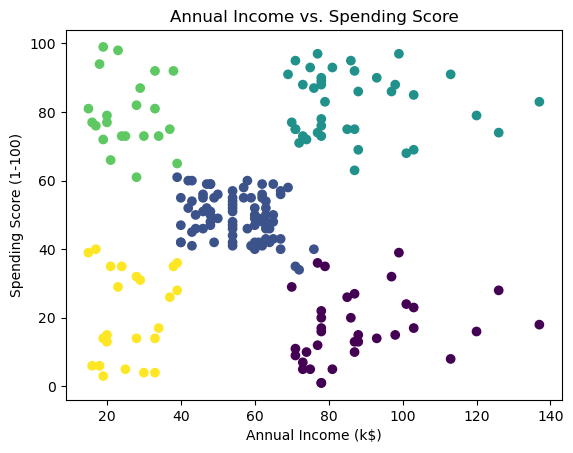

In [35]:
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], c=df['Cluster'])
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Annual Income vs. Spending Score')
plt.show()

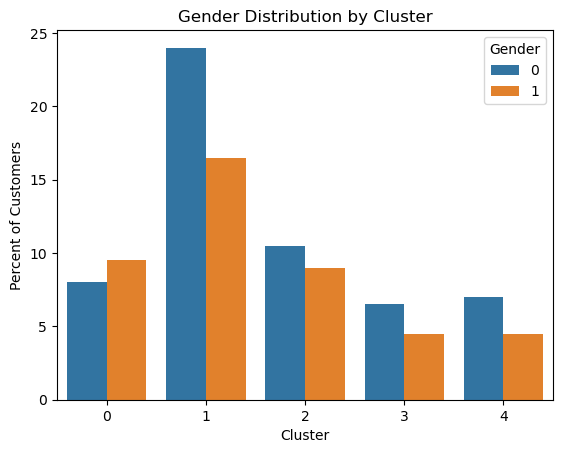

In [36]:
gender_counts = df.groupby(['Cluster', 'Gender']).size().reset_index(name='Count')
gender_counts['Percent'] = gender_counts['Count'] / len(df) * 100
sns.barplot(x='Cluster', y='Percent', hue='Gender', data=gender_counts)
plt.xlabel('Cluster')
plt.ylabel('Percent of Customers')
plt.title('Gender Distribution by Cluster')
plt.show()

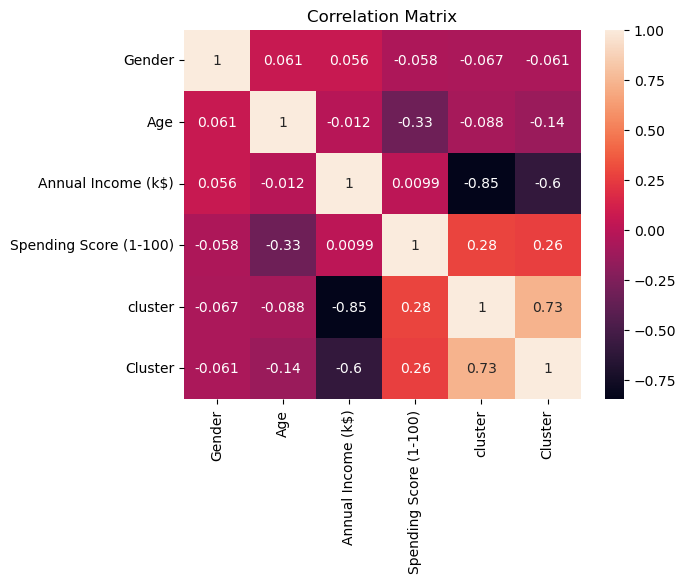

In [37]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True)
plt.title('Correlation Matrix')
plt.show()